# Visualizing final data set 

In [25]:
# Importing packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

from os import path 

import sys

from tensorflow.python.eager.context import num_gpus
sys.path.append("../..")
from DexterousManipulation.training.data_loader import load_reachable_from_data_set, load_all_from_data_set, load_filtered_data

from mpl_toolkits import mplot3d # For 3D plotting 

from matplotlib.patches import Rectangle

## Loading data

In [26]:
# Hyper-paramters 

basepath = path.abspath('')

# Folder in which data will be saved 
folder_saving_str_big = path.abspath(path.join(basepath, "..", "Figures/Data/BIG_BOX" ))
folder_saving_str_medium = path.abspath(path.join(basepath, "..", "Figures/Data/MEDIUM_BOX" ))
folder_saving_str_small = path.abspath(path.join(basepath, "..", "Figures/Data/SMALL_BOX" ))
folder_saving_str_cyli = path.abspath(path.join(basepath, "..", "Figures/Data/CYLINDRE" ))

folder_saving_str_general = path.abspath(path.join(basepath, "..", "Figures/Data" ))

folder_saving_str_test = path.abspath(path.join(basepath, "..", "Figures/Data" ))

nb_data_files = 1000
# nb_data_files = 500
apply_one_hot_encoding = False 

# Data folder from which data will be pulled 
data_set_folder_big = "DATA_SET_BIG_BOX"
data_set_folder_medium = "DATA_SET_MEDIUM_BOX"
data_set_folder_small = "DATA_SET_SMALL_BOX"

data_set_folder_cyli = "DATA_SET_CYLINDRE" # NOTE: Cylindre has 1m height, 0.05m radius, scaled down 0.04, like big cube 

data_set_folder_test = "DATA_SET_SMALL_BOX"

file_prefix = "classification_data_grasping_" 

num_bins = 100 # for histogram 

In [27]:
#TEST
metrics_test, object_infos_test, hand_infos_test, time_taken = load_filtered_data(apply_one_hot_encoding, data_set_folder_test, file_prefix, nb_data_files)
# Loading time 
print("Time needed to load the data (in seconds): ", time_taken)
# Displaying total number of samples 
print("Number of loaded samples for big object", len(metrics_test))

Time needed to load the data (in seconds):  4.643501281738281
Number of loaded samples for big object 502547


In [28]:
# Loading data of cylindre 
metrics_cyli, object_infos_cyli, hand_infos_cyli, time_taken = load_filtered_data(apply_one_hot_encoding, data_set_folder_cyli, file_prefix, nb_data_files)
# Loading time 
print("Time needed to load the data (in seconds): ", time_taken)
# Displaying total number of samples 
print("Number of loaded samples for big object", len(metrics_cyli))

Time needed to load the data (in seconds):  4.825459957122803
Number of loaded samples for big object 389872


In [29]:
# Loading filtered data for big object
metrics_big, object_infos_big, hand_infos_big, time_taken = load_filtered_data(apply_one_hot_encoding, data_set_folder_big, file_prefix, nb_data_files)
# Loading time 
print("Time needed to load the data (in seconds): ", time_taken)
# Displaying total number of samples 
print("Number of loaded samples for big object", len(metrics_big))

Time needed to load the data (in seconds):  4.312058687210083
Number of loaded samples for big object 237251


In [30]:
# Loading filtered data for medium object
metrics_medium, object_infos_medium, hand_infos_medium, time_taken = load_filtered_data(apply_one_hot_encoding, data_set_folder_medium, file_prefix, nb_data_files)
# Loading time 
print("Time needed to load the data (in seconds): ", time_taken)
# Displaying total number of samples 
print("Number of loaded samples for medium object", len(metrics_medium))

Time needed to load the data (in seconds):  20.807724237442017
Number of loaded samples for medium object 308986


In [31]:
# Loading filtered data for small object
metrics_small, object_infos_small, hand_infos_small, time_taken = load_filtered_data(apply_one_hot_encoding, data_set_folder_small, file_prefix, nb_data_files)
# Loading time 
print("Time needed to load the data (in seconds): ", time_taken)
# Displaying total number of samples 
print("Number of loaded samples for small object", len(metrics_small))

Time needed to load the data (in seconds):  4.822060823440552
Number of loaded samples for small object 502547


In [32]:
# Multiplying metrics by 100, as cm are more readable
for index in range(len(metrics_big)): 
    metrics_big[index] = metrics_big[index] * 100 

for index in range(len(metrics_medium)): 
    metrics_medium[index] = metrics_medium[index] * 100 
    
for index in range(len(metrics_small)): 
    metrics_small[index] = metrics_small[index] * 100 

In [33]:
# Multiplying metrics by 100, as cm are more readable
for index in range(len(metrics_test)): 
    metrics_test[index] = metrics_test[index] * 100 

In [34]:
# Multiplying metrics by 100, as cm are more readable
for index in range(len(metrics_cyli)): 
    metrics_cyli[index] = metrics_cyli[index] * 100 

In [35]:
# Function used to filter out specific infos
def fetch_info(metrics, object_infos, hand_infos): 
    # Fetching x, y  and z positions of the hand for that class 
    x_positions = [] 
    y_positions = [] 
    z_positions = []
    for index in range(len(hand_infos)): 
        x_positions.append(hand_infos[index][0])
        y_positions.append(hand_infos[index][1])
        z_positions.append(hand_infos[index][2])

    # Fetching distances 
    distances = [] 
    long_dist = []
    non_zero_x = [] 
    non_zero_y = [] 
    non_zero_z = [] 
    for index in range(len(metrics)): 
        distances.append(metrics[index])
        if metrics[index] > 0.1: 
            long_dist.append(metrics[index])
            non_zero_x.append([hand_infos[index][0]])
            non_zero_y.append([hand_infos[index][1]])
            non_zero_z.append([hand_infos[index][2]])

    return x_positions, y_positions, z_positions, distances, long_dist, non_zero_x, non_zero_y, non_zero_z

In [36]:
x_positions_big, y_positions_big, z_positions_big, distances_big, long_dist_big, non_zero_x_big, non_zero_y_big, non_zero_z_big = fetch_info(metrics_big, object_infos_big, hand_infos_big) 

x_positions_medium, y_positions_medium, z_positions_medium, distances_medium, long_dist_medium, non_zero_x_medium, non_zero_y_medium, non_zero_z_medium = fetch_info(metrics_medium, object_infos_medium, hand_infos_medium) 

x_positions_small, y_positions_small, z_positions_small, distances_small, long_dist_small, non_zero_x_small, non_zero_y_small, non_zero_z_small = fetch_info(metrics_small, object_infos_small, hand_infos_small) 

In [37]:
x_positions_test, y_positions_test, z_positions_test, distances_test, long_dist_test, non_zero_x_test, non_zero_y_test, non_zero_z_test = fetch_info(metrics_test, object_infos_test, hand_infos_test) 

In [38]:
x_positions_cyli, y_positions_cyli, z_positions_cyli, distances_cyli, long_dist_cyli, non_zero_x_cyli, non_zero_y_cyli, non_zero_z_cyli = fetch_info(metrics_cyli, object_infos_cyli, hand_infos_cyli) 

## Figures

### Joint distances 

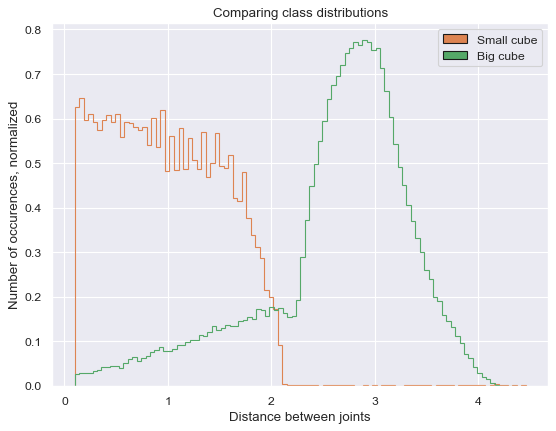

In [39]:
# Histogram 
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(long_dist_small, bins=num_bins, density=True, histtype='step', color="C1", stacked=True)
plt.hist(long_dist_big, bins=num_bins, density=True, histtype='step', color="C2", stacked=True)
plt.xlabel("Distance between joints")
plt.ylabel("Number of occurences, normalized")
plt.title("Comparing class distributions")
#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ["C1", "C2"]]
labels= ["Small cube","Big cube"]
plt.legend(handles, labels)
plt.savefig(folder_saving_str_general + "/Comparing_long_dist_small_big.png")
plt.show()

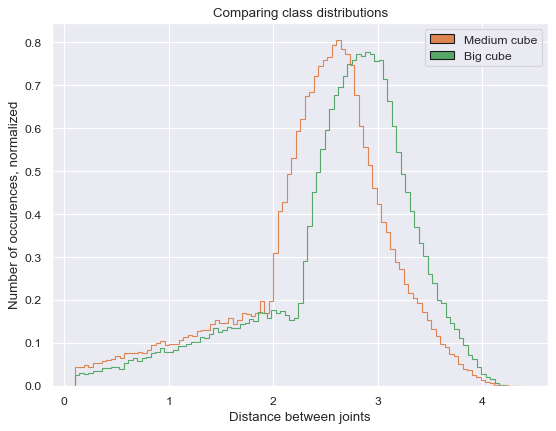

In [40]:
# Histogram 
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(long_dist_medium, bins=num_bins, density=True, histtype='step', color="C1", stacked=True)
plt.hist(long_dist_big, bins=num_bins, density=True, histtype='step', color="C2", stacked=True)
plt.xlabel("Distance between joints")
plt.ylabel("Number of occurences, normalized")
plt.title("Comparing class distributions")
#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ["C1", "C2"]]
labels= ["Medium cube","Big cube"]
plt.legend(handles, labels)
plt.savefig(folder_saving_str_general + "/Comparing_long_dist_medium_big.png")
plt.show()

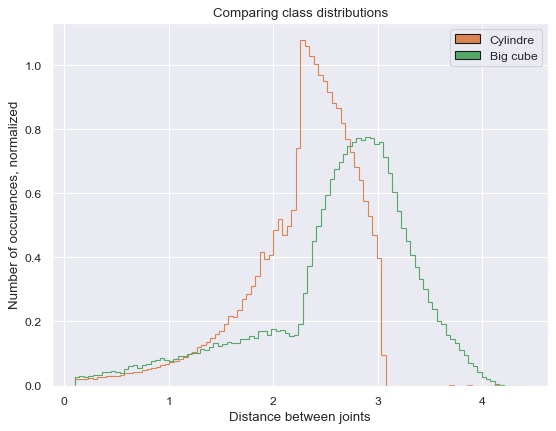

In [41]:
# Histogram 
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(long_dist_cyli, bins=num_bins, density=True, histtype='step', color="C1", stacked=True)
plt.hist(long_dist_big, bins=num_bins, density=True, histtype='step', color="C2", stacked=True)
plt.xlabel("Distance between joints")
plt.ylabel("Number of occurences, normalized")
plt.title("Comparing class distributions")
#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ["C1", "C2"]]
labels= ["Cylindre","Big cube"]
plt.legend(handles, labels)
plt.savefig(folder_saving_str_cyli + "/Comparing_long_dist_cyli_big.png")
plt.show()

### Hand positions 

#### XY

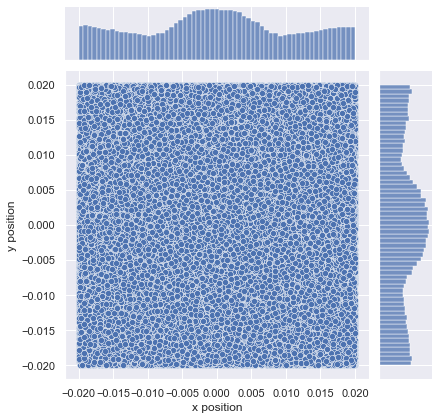

In [47]:
df = pd.DataFrame({"x position": x_positions_big, "y position": y_positions_big})
h = sns.jointplot(data=df, x="x position", y="y position")
# JointGrid has a convenience function
h.savefig(folder_saving_str_big + "/Jointplot_XY_big.png")
plt.show()

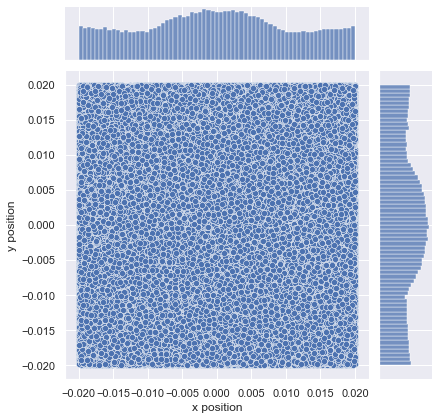

In [48]:
df = pd.DataFrame({"x position": x_positions_medium, "y position": y_positions_medium})
h = sns.jointplot(data=df, x="x position", y="y position")
h.savefig(folder_saving_str_medium + "/Jointplot_XY_medium.png")
plt.show()

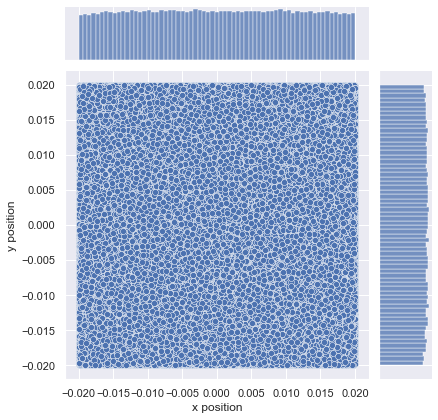

In [49]:
df = pd.DataFrame({"x position": x_positions_small, "y position": y_positions_small})
h = sns.jointplot(data=df, x="x position", y="y position")
h.savefig(folder_saving_str_small + "/Jointplot_XY_small.png")
plt.show()

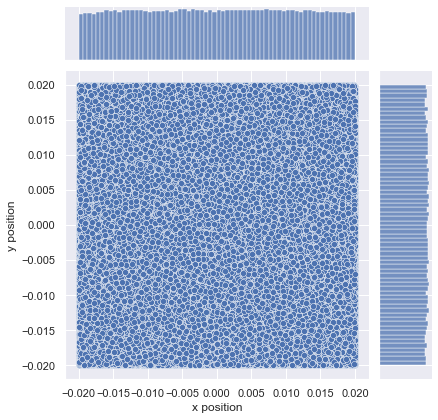

In [7]:
df = pd.DataFrame({"x position": x_positions_test, "y position": y_positions_test})
h = sns.jointplot(data=df, x="x position", y="y position")
h.savefig(folder_saving_str_test + "/Jointplot_XY_test.png")
plt.show()

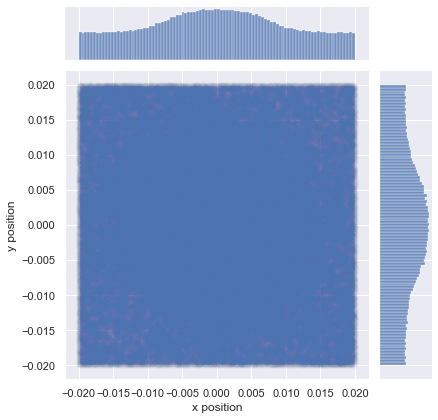

In [43]:
df = pd.DataFrame({"x position": x_positions_cyli, "y position": y_positions_cyli})
h = sns.jointplot(data=df, x="x position", y="y position", alpha = 0.01)
h.savefig(folder_saving_str_cyli + "/Jointplot_XY_cyli.png")
plt.show()

#### XZ 

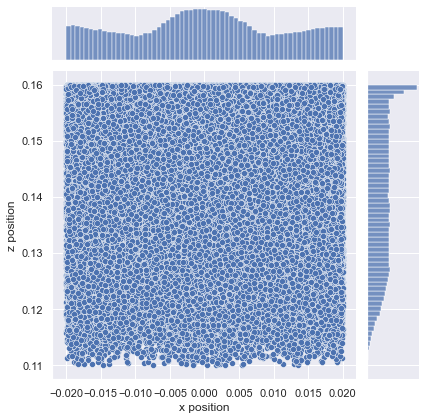

In [50]:
df = pd.DataFrame({"x position": x_positions_big, "z position": z_positions_big})
h = sns.jointplot(data=df, x="x position", y="z position")
h.savefig(folder_saving_str_big + "/Jointplot_XZ_big.png")
plt.show()

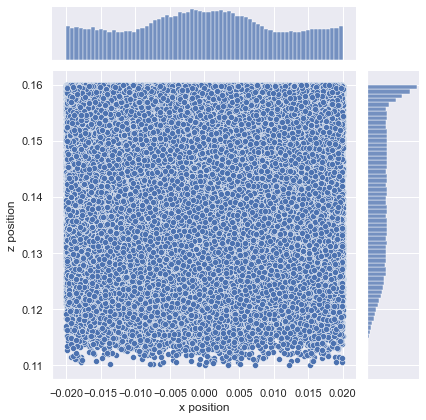

In [51]:
df = pd.DataFrame({"x position": x_positions_medium, "z position": z_positions_medium})
h = sns.jointplot(data=df, x="x position", y="z position")
h.savefig(folder_saving_str_medium + "/Jointplot_XZ_medium.png")
plt.show()

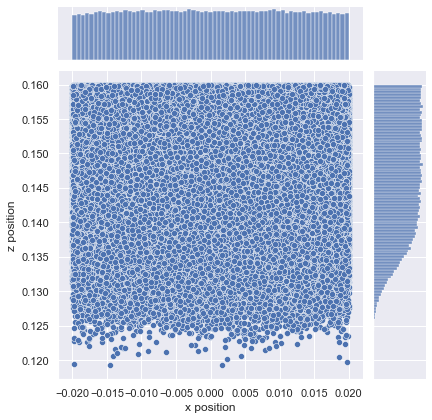

In [52]:
df = pd.DataFrame({"x position": x_positions_small, "z position": z_positions_small})
h = sns.jointplot(data=df, x="x position", y="z position")
h.savefig(folder_saving_str_small + "/Jointplot_XZ_small.png")
plt.show()

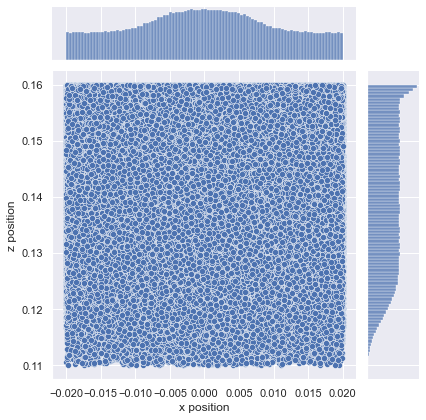

In [44]:
df = pd.DataFrame({"x position": x_positions_cyli, "z position": z_positions_cyli})
h = sns.jointplot(data=df, x="x position", y="z position")
h.savefig(folder_saving_str_cyli + "/Jointplot_XZ_cyli.png")
plt.show()

#### Joint distance wrt. Z 

In [1]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(long_dist_big, non_zero_z_big, alpha = 0.005)
plt.xlabel("joint distance")
plt.ylabel("z coordinate")
plt.title("")
plt.savefig(folder_saving_str_big + "/Jointplot_TZ_big.png")
plt.show()

NameError: name 'plt' is not defined

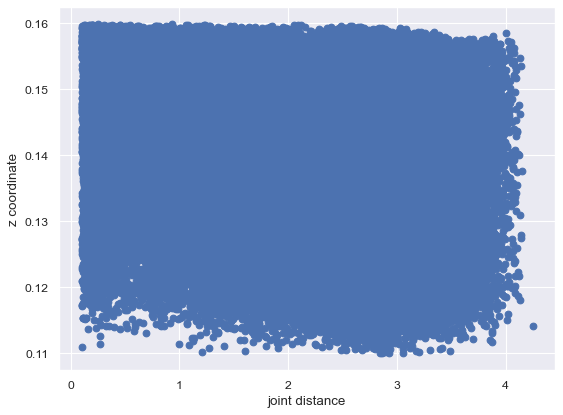

In [54]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(long_dist_medium, non_zero_z_medium)
plt.xlabel("joint distance")
plt.ylabel("z coordinate")
plt.title("")
plt.savefig(folder_saving_str_medium + "/Jointplot_TZ_medium.png")
plt.show()

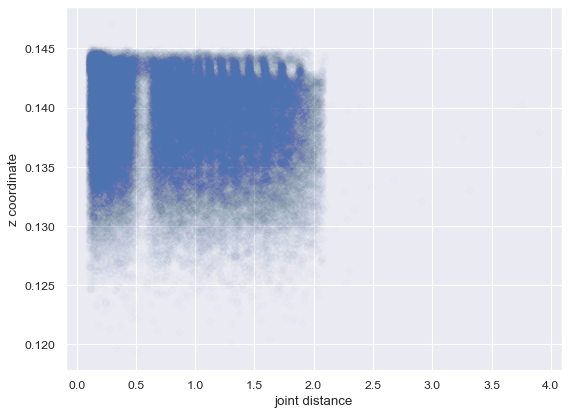

In [60]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(long_dist_small, non_zero_z_small, alpha = 0.01)
plt.xlabel("joint distance")
plt.ylabel("z coordinate")
plt.title("")
plt.savefig(folder_saving_str_small + "/Jointplot_TZ_small.png")
plt.show()

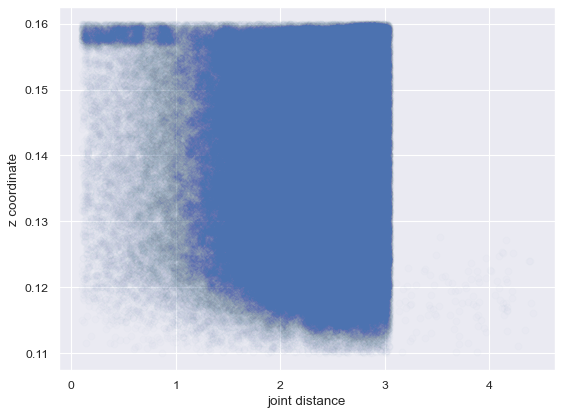

In [45]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(long_dist_cyli, non_zero_z_cyli, alpha = 0.01)
plt.xlabel("joint distance")
plt.ylabel("z coordinate")
plt.title("")
plt.savefig(folder_saving_str_cyli + "/Jointplot_TZ_cyli.png")
plt.show()

#### Joint distance wrt. X

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(non_zero_x_big, long_dist_big, alpha = 0.01)
plt.xlabel("x coordinate")
plt.ylabel("joint distance")
plt.title("")
plt.savefig(folder_saving_str_big + "/Jointplot_XT_big.png")
plt.show()

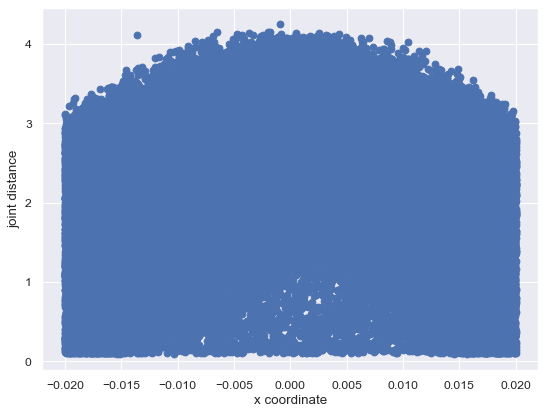

In [57]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(non_zero_x_medium, long_dist_medium)
plt.xlabel("x coordinate")
plt.ylabel("joint distance")
plt.title("")
plt.savefig(folder_saving_str_medium + "/Jointplot_XT_medium.png")
plt.show()

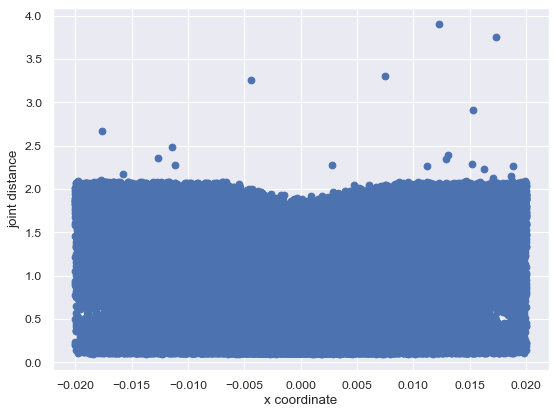

In [58]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(non_zero_x_small, long_dist_small)
plt.xlabel("x coordinate")
plt.ylabel("joint distance")
plt.title("")
plt.savefig(folder_saving_str_small + "/Jointplot_XT_small.png")
plt.show()

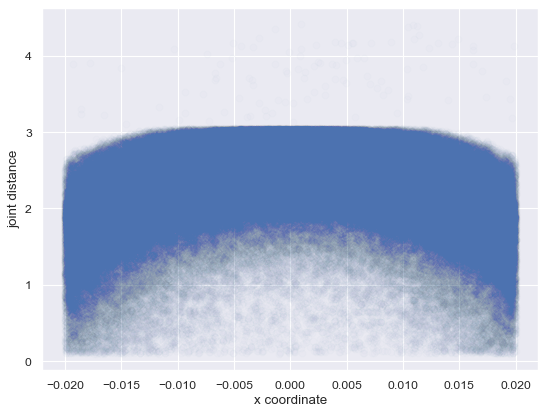

In [46]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(non_zero_x_cyli, long_dist_cyli, alpha = 0.01)
plt.xlabel("x coordinate")
plt.ylabel("joint distance")
plt.title("")
plt.savefig(folder_saving_str_cyli + "/Jointplot_XT_cyli.png")
plt.show()

### MISC

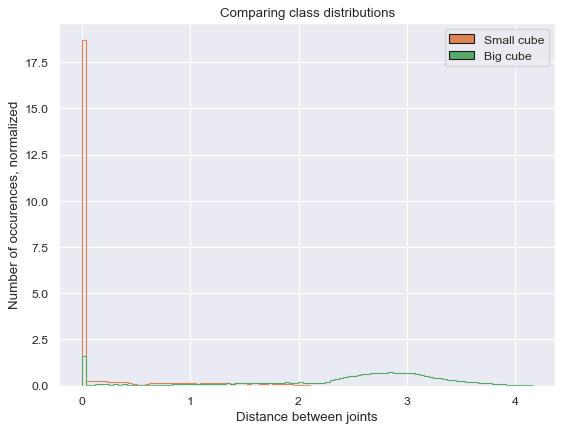

In [23]:
# Histogram (just to show why 0 distances are filtered out) 
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(distances_small, bins=num_bins, density=True, histtype='step', color="C1", stacked=True)
plt.hist(distances_big, bins=num_bins, density=True, histtype='step', color="C2", stacked=True)
plt.xlabel("Distance between joints")
plt.ylabel("Number of occurences, normalized")
plt.title("Comparing class distributions")
#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ["C1", "C2"]]
labels= ["Small cube","Big cube"]
plt.legend(handles, labels)
plt.savefig(folder_saving_str_general + "/Comparing_all_dist_small_big.png")
plt.show()